In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\julia\DATA SCIENCE IT\FINAL PROJECT\Half_Ironman.csv")
df

,Gender,AgeGroup,AgeBand,Country,EventYear,EventLocation,SwimTime,Transition1Time,BikeTime,Transition2Time,RunTime,FinishTime
0,M,40-44,40,Andorra,2019,IRONMAN 70.3 South American Championship Bueno...,1679,119,9107,95,5515,16514
1,M,45-49,45,Andorra,2019,IRONMAN 70.3 South American Championship Bueno...,2070,177,9160,132,6070,17609
2,M,45-49,45,Andorra,2020,IRONMAN 70.3 Bariloche,1667,161,9891,122,5190,17031
3,M,45-49,45,Andorra,2019,IRONMAN 70.3 World Championship,1750,183,10363,160,5071,17527
4,M,40-44,40,Andorra,2019,IRONMAN 70.3 World Championship,2063,182,10065,142,5556,18008
...,...,...,...,...,...,...,...,...,...,...,...,...
840070,M,50-54,50,Zimbabwe,2015,IRONMAN 70.3 South Africa,2054,261,10527,160,6070,19072
840071,M,40-44,40,Zimbabwe,2015,IRONMAN 70.3 South Africa,2449,352,11866,265,8461,23393
840072,F,30-34,30,Zimbabwe,2015,IRONMAN 70.3 Steelhead,2171,357,11433,332,7754,22047
840073,F,35-39,35,Zimbabwe,2015,IRONMAN 70.3 Budapest,2100,193,10280,233,6148,18954


C:\Users\julia\AppData\Local\Temp\ipykernel_29544\3975732559.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='RdBu_r')


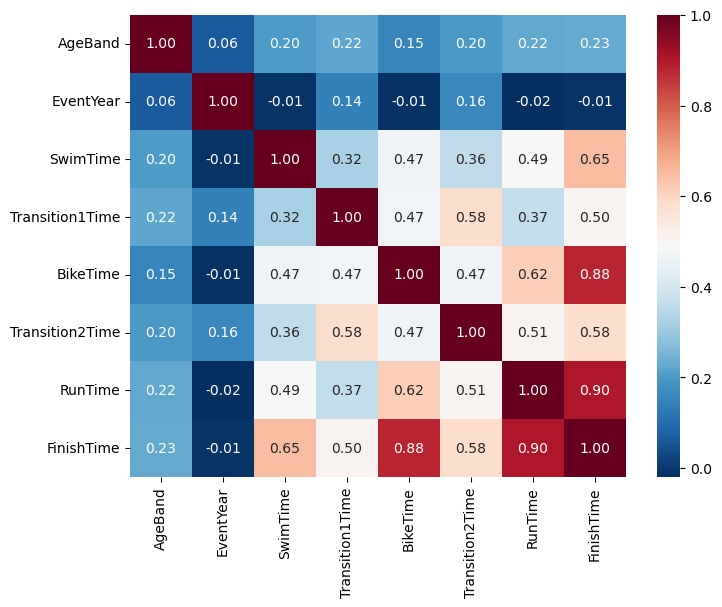

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='RdBu_r')
plt.show()

In [3]:
columnas_a_eliminar = ['AgeBand','SwimTime','EventYear', 'BikeTime', 'RunTime','EventLocation', 'Country']
df_xg = df.drop(columnas_a_eliminar, axis=1)

In [4]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df_xg['Gender_ID'] = labelEncoder.fit_transform(df_xg['Gender'])
df_xg.sample(5)

,Gender,AgeGroup,Transition1Time,Transition2Time,FinishTime,Gender_ID
294162,M,50-54,193,148,16205,1
550363,F,30-34,454,467,28570,0
838169,F,45-49,341,301,25096,0
537726,M,30-34,161,167,22450,1
499664,M,60-64,323,197,25469,1


In [5]:
def first2(s):
    return s[:2]
    
df_xg['AgeGroup_ID'] = df_xg['AgeGroup'].apply(first2).astype(int)
df_xg.sample(5)

,Gender,AgeGroup,Transition1Time,Transition2Time,FinishTime,Gender_ID,AgeGroup_ID
326351,M,35-39,307,181,20283,1,35
167457,M,35-39,203,138,16917,1,35
81301,M,30-34,241,155,18609,1,30
174954,M,45-49,337,241,18499,1,45
633544,M,50-54,237,385,22706,1,50


C:\Users\julia\AppData\Local\Temp\ipykernel_29544\4224333657.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_xg.corr(),annot=True,fmt=".2f",cmap='RdBu_r')


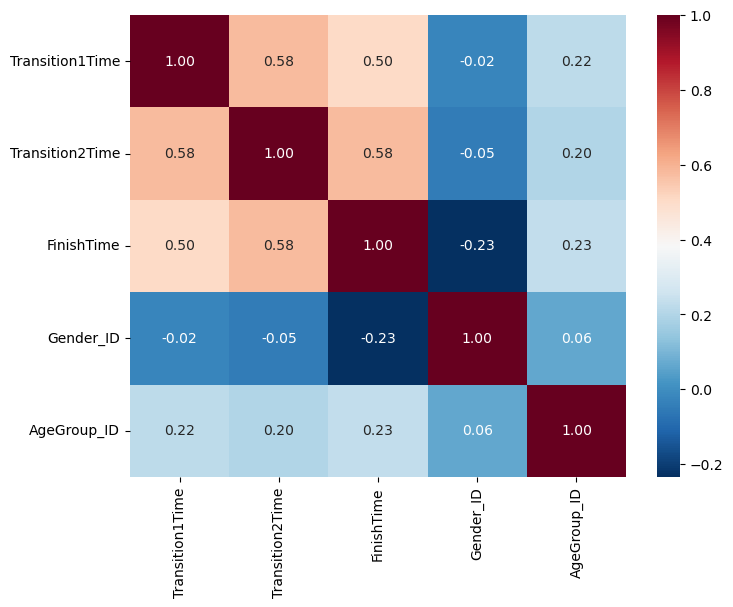

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_xg.corr(),annot=True,fmt=".2f",cmap='RdBu_r')
plt.show()

## Divide data in train and test subsets

In [7]:
target = 'FinishTime'
predictors = ['Gender_ID', 'AgeGroup_ID', 'Transition1Time', 'Transition2Time' ]

X =  df_xg[predictors]
y = df_xg[target]

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 630056 samples.
Testing set has 210019 samples.


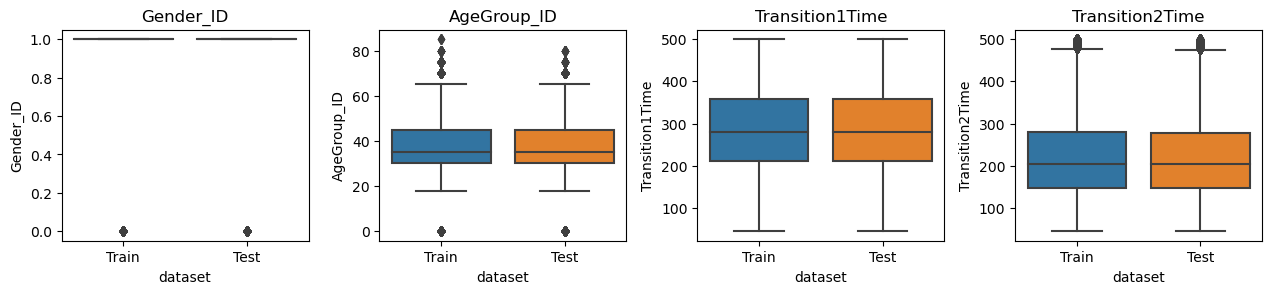

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Boxplots per comparar les distribucions:
plt.figure(figsize=(16, 8))
for i, feature in enumerate(X_train.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x='dataset', y=feature, data=pd.concat([X_train.assign(dataset='Train'), X_test.assign(dataset='Test')]))
    plt.title(feature)

plt.tight_layout()
plt.show()

Després d'analitzar i comparar els conjunts graficament es podria dir que no hi ha diferencies significatives entre els dos conjunts.  El que si que es important de comentar es que en les variables hi trobem outliers en el test set. Posteriorment es tractaran amb l'aplicacio de transformacions...
Procedeixo a fer un test d'hipotesis per comprovar analiticament que no existeixen diferencies:

**Test de Shapiro-Wilk:**
- **Hipòtesi Nul·la (H0):** Les dades segueixen una distribució Normal
- **Hipòtesi Alternativa (H1):** Les dades NO segueixen una distribució Normal

In [10]:
from scipy import stats
from scipy.stats import shapiro

for data in X_train.columns:
    shapiro_test = stats.shapiro(X_train[data])
    print( "variable:", data, "p-valor:", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("La mostra té una distribució normal.\n")
    else:
        print("La mostra No té una distribució normal.\n")

variable: Gender_ID p-valor: 0.0
La mostra No té una distribució normal.

variable: AgeGroup_ID p-valor: 0.0
La mostra No té una distribució normal.

variable: Transition1Time p-valor: 0.0
La mostra No té una distribució normal.

variable: Transition2Time p-valor: 0.0
La mostra No té una distribució normal.



C:\Users\julia\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Tal i com indiquen els test de Shapiro concluim que ninguna variable segueix una distribució normal. Per comparar les dos mostres es pot utilizar el test de U de Mann-Whitney, que es una proba no parametrica utilitzada per comparar dues mostres independents i no requereix que hi hagi una distribució específica de les dades, per tant ideal en el nostre cas.

**Test de U de Mann-Whitney**

- **Hipòtesi Nul·la (H0):** La distribució de les dues mostres és la mateixa
- **Hipòtesi Alternativa (H1):** Hi ha diferències significatives entre les dues mostres

In [11]:
from scipy.stats import mannwhitneyu

for variable in X_train.columns:
    statistic, p_value = mannwhitneyu(X_train[variable], X_test[variable])
    
    print(f"Variable: {variable}")
    print(f"Estadístic U: {statistic}")
    print(f"p-valor: {p_value}")
    
    if p_value < 0.05:
        print("Hi ha diferències significatives entre les dues mostres.\n")
    else:
        print("La distribució entre les dues mostres és la mateixa.\n")

Variable: Gender_ID
Estadístic U: 66071216892.0
p-valor: 0.2050508083460314
La distribució entre les dues mostres és la mateixa.

Variable: AgeGroup_ID
Estadístic U: 66223796159.0
p-valor: 0.5150267604187935
La distribució entre les dues mostres és la mateixa.

Variable: Transition1Time
Estadístic U: 66181727982.5
p-valor: 0.8365017032815301
La distribució entre les dues mostres és la mateixa.

Variable: Transition2Time
Estadístic U: 66241239997.0
p-valor: 0.4095422372545702
La distribució entre les dues mostres és la mateixa.



Donat els resultats, podem dir que la funcio train_test_split ha funcionat prou bé, ja que no s'observen diferenecies significatives entre train i test.

Vull saber quines variables tenen outliers (valors atipics), per si s'ha d'aplicar el Robust scale.

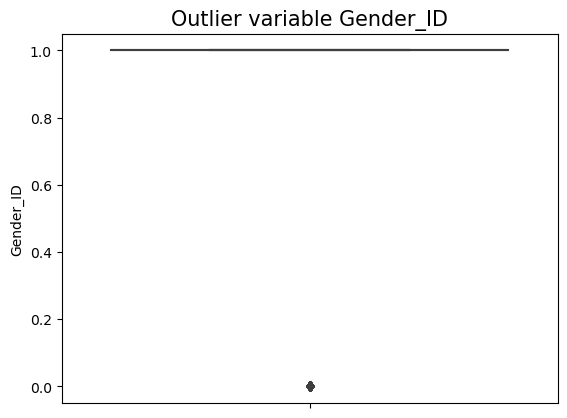

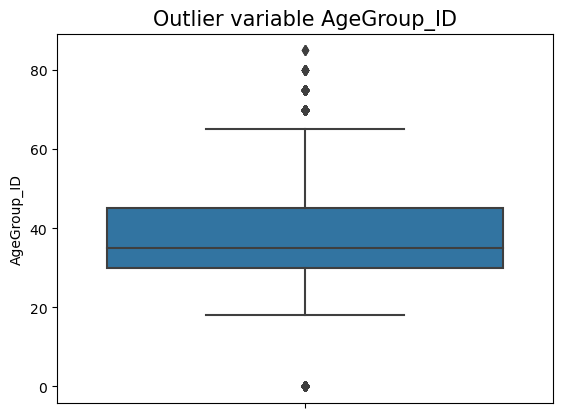

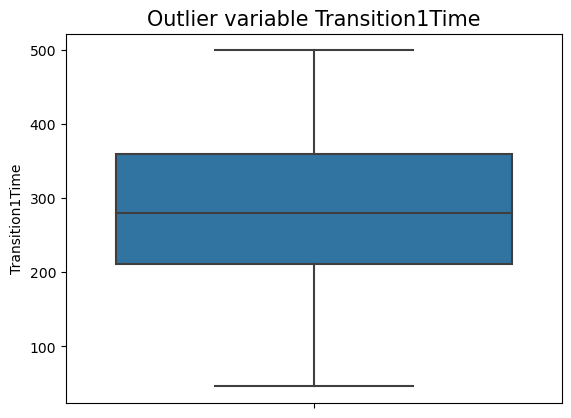

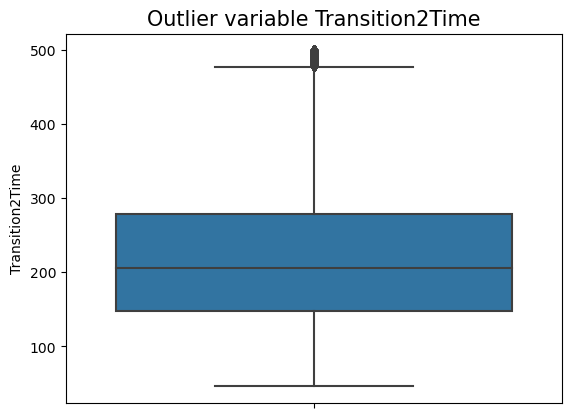

In [12]:
columnes=X_train.columns.tolist()
for i in columnes:
    sns.boxplot(data=X_train, y=i) 
    plt.title("Outlier variable "+ i, size=15)
    plt.show()

Totes les variables, menys Transition1Time, tenen outliers.

Un cop sé quines variables tenen outliers i quines no, faré el Robust Scale a totes les variables del training set amb outliers ( Gender, AgeGroup, Transition2Time).  La transformació es fa en el training set perque representa que el test set no el conec. Pero abans faig una copia per tenir els valors de X_train originals (sense transformacions).

In [13]:
X_train_transformat = X_train.copy() 
X_train_transformat.head(10)

,Gender_ID,AgeGroup_ID,Transition1Time,Transition2Time
414043,1,25,348,295
808664,1,40,282,164
799645,1,30,348,236
450058,1,30,308,256
810913,1,30,149,70
660401,1,45,151,185
370590,1,35,335,212
198947,0,35,144,274
219932,1,50,367,349
47356,0,50,246,210


In [14]:
from sklearn import preprocessing 
X_train_transformat[["Gender_ID","Transition2Time","AgeGroup_ID"]]=preprocessing.RobustScaler().fit_transform(X_train_transformat[["Gender_ID","Transition2Time","AgeGroup_ID"]])
X_train_transformat.head(10)

,Gender_ID,AgeGroup_ID,Transition1Time,Transition2Time
414043,0.0,-0.666667,348,0.681818
808664,0.0,0.333333,282,-0.310606
799645,0.0,-0.333333,348,0.234848
450058,0.0,-0.333333,308,0.386364
810913,0.0,-0.333333,149,-1.022727
660401,0.0,0.666667,151,-0.151515
370590,0.0,0.000000,335,0.053030
198947,-1.0,0.000000,144,0.522727
219932,0.0,1.000000,367,1.090909
47356,-1.0,1.000000,246,0.037879


Després d'elminar els outliers amb l'ús del robust scaler,transformaré la variable restant amb el MinMaxScaler. 

In [15]:
X_train_transformat[['Transition1Time']]=preprocessing.MinMaxScaler().fit_transform(X_train_transformat[['Transition1Time']])
X_train_transformat.head(10)

,Gender_ID,AgeGroup_ID,Transition1Time,Transition2Time
414043,0.0,-0.666667,0.666667,0.681818
808664,0.0,0.333333,0.520971,-0.310606
799645,0.0,-0.333333,0.666667,0.234848
450058,0.0,-0.333333,0.578366,0.386364
810913,0.0,-0.333333,0.227373,-1.022727
660401,0.0,0.666667,0.231788,-0.151515
370590,0.0,0.000000,0.637969,0.053030
198947,-1.0,0.000000,0.216336,0.522727
219932,0.0,1.000000,0.708609,1.090909
47356,-1.0,1.000000,0.441501,0.037879


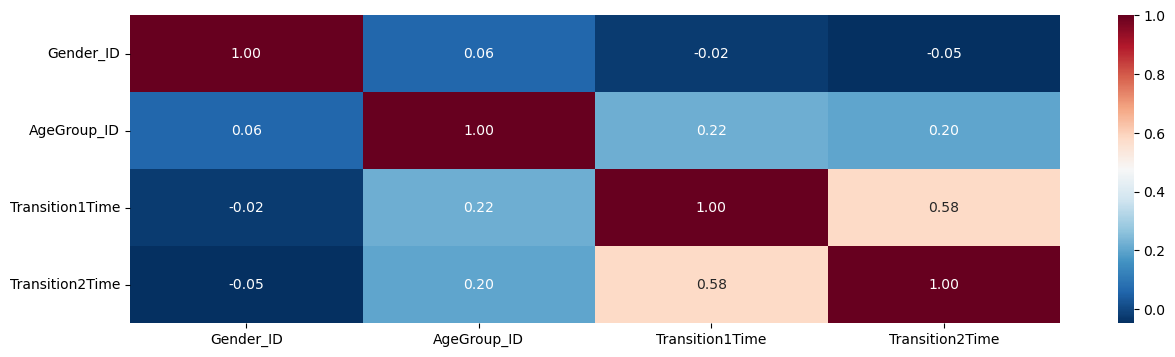

In [16]:
plt.figure(figsize=(15, 4))
sns.heatmap(X_train_transformat.corr(),annot=True,fmt=".2f",cmap='RdBu_r')
plt.show()

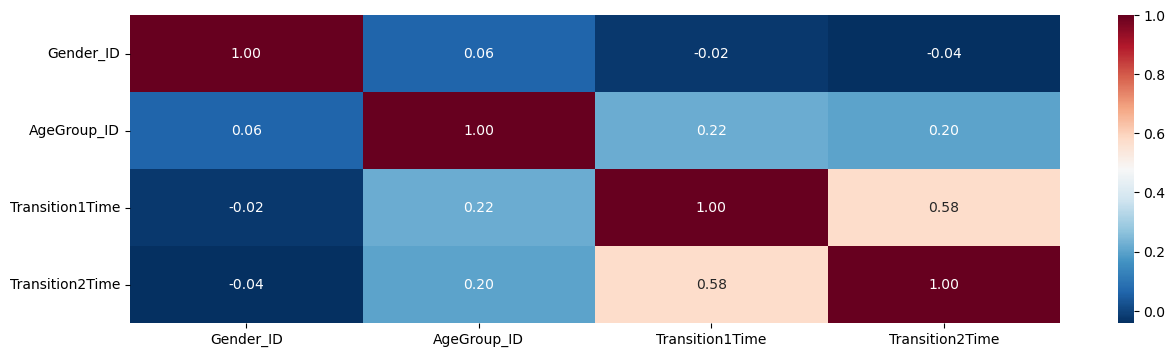

In [17]:
plt.figure(figsize=(15
                    , 4))
sns.heatmap(X_test.corr(),annot=True,fmt=".2f",cmap='RdBu_r')
plt.show()

Si mirem les taules de correlació observem que aquesta no ha variat significativament amb la transformacio del conjunt de dades!

# Models per predir el Finish Time

## Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
#Creo un model de regressió de Regressio lineal
RL = LinearRegression()
#entreno el model
RL.fit(X_train, y_train)
#faig les prediccions del conjunt de proba (x_test)
lr_y_test_pred = RL.predict(X_test)
    

In [19]:
from sklearn.metrics import r2_score
r2_rl = r2_score(y_test, lr_y_test_pred)
print('El coeficient de determinació és:', r2_rl)

El coeficient de determinació és: 0.43003719642766847


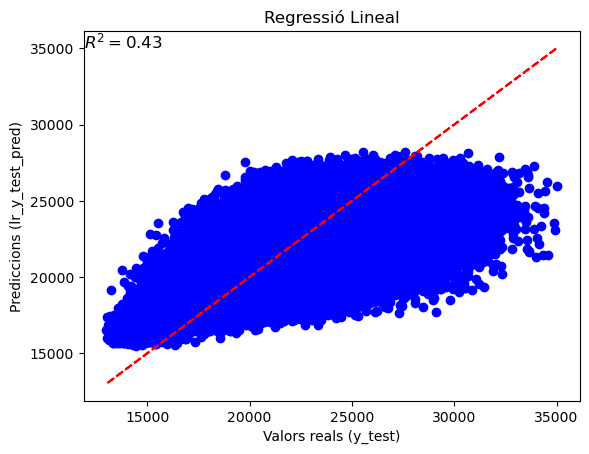

In [20]:
import matplotlib.pyplot as plt

plt.scatter(y_test, lr_y_test_pred, color='Blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Valors reals (y_test)')
plt.ylabel('Prediccions (lr_y_test_pred)')
plt.title('Regressió Lineal')

plt.text(plt.xlim()[0], plt.ylim()[1], f'$R^2={r2_rl:.2f}$', fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.show()

El grafic de la figura superior es tracta d'un gràfic de dispersió que compara els valors reals *y_test* amb les prediccions del model de regressió lineal *lr_y_test_pred*. La linia diagonal en vermell representa la linia on els valores reals i els predits serien iguals. Com es pot observar els valors no s'hi acosten força a la linia, indicant que la predicció es baixa.

## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
#Creo un model de regressió de Random Forest
RF = RandomForestRegressor()
#Entreno el model
RF.fit(X_train, y_train)
#Faig les prediccions al conjunt proba (x_test)
rf_y_test_pred = RF.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test, rf_y_test_pred)
print('El coeficient de determinació de RANDOM FOREST és:', r2_rf)

El coeficient de determinació de RANDOM FOREST és: 0.3016705546541295


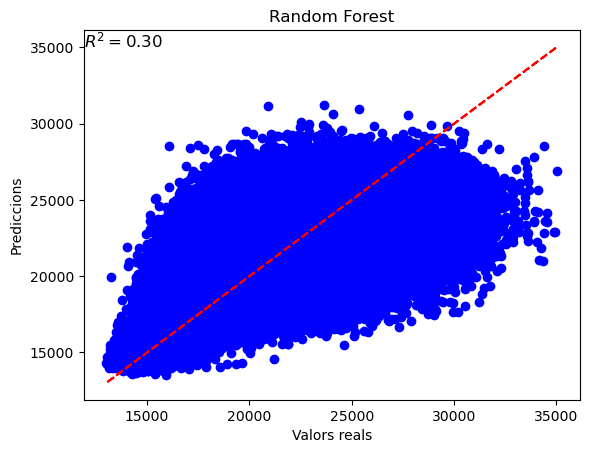

In [23]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_y_test_pred, color='Blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('Random Forest')
plt.text(plt.xlim()[0], plt.ylim()[1], f'$R^2={r2_rf:.2f}$', fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.show()

## KNeighbors Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
#Entreno el model
KNR.fit(X_train, y_train)
#Faig les prediccions al conjunt proba (x_test)
knr_y_test_pred = KNR.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
r2_knr = r2_score(y_test, knr_y_test_pred)
print('El coeficient de determinació de KNeighbors Regressor és:', r2_knr)

El coeficient de determinació de KNeighbors Regressor és: 0.30317712211739645


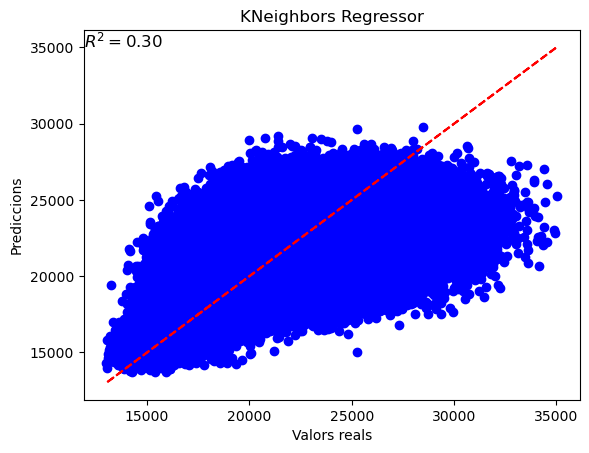

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test, knr_y_test_pred, color='Blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('KNeighbors Regressor')
plt.text(plt.xlim()[0], plt.ylim()[1], f'$R^2={r2_knr:.2f}$', fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.show()

## Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 42)
#Entreno el model
DTR.fit(X_train, y_train)
#Faig les prediccions al conjunt proba (x_test)
dtr_y_test_pred = DTR.predict(X_test)

In [28]:
from sklearn.metrics import r2_score
r2_dtr = r2_score(y_test, dtr_y_test_pred)
print('El coeficient de determinació de Decision Tree Regressor és:', r2_dtr)

El coeficient de determinació de Decision Tree Regressor és: -0.06996166204145604


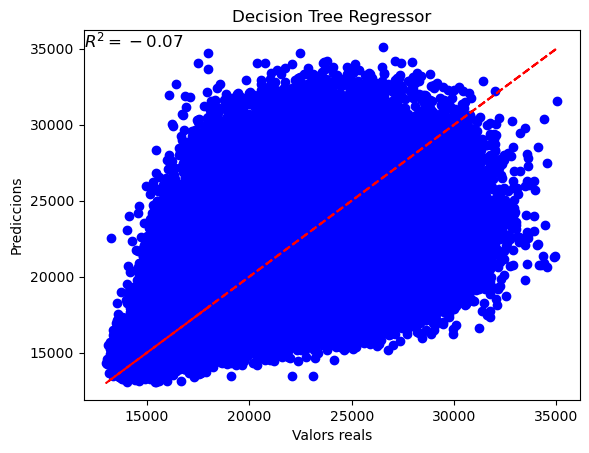

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, dtr_y_test_pred, color='Blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Valors reals')
plt.ylabel('Prediccions')
plt.title('Decision Tree Regressor')
plt.text(plt.xlim()[0], plt.ylim()[1], f'$R^2={r2_dtr:.2f}$', fontsize=12, verticalalignment='top', horizontalalignment='left')

plt.show()

## Comparació de MSE

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
mse_regressio_lineal = mean_squared_error(y_test, lr_y_test_pred)
mse_random_forest = mean_squared_error(y_test, rf_y_test_pred)
mse_KNR = mean_squared_error(y_test,knr_y_test_pred) 
mse_DTR = mean_squared_error(y_test,dtr_y_test_pred)

In [31]:
df = pd.DataFrame(data = [["Regressió Lineal",  r2_rl, mse_regressio_lineal],["RandomForest", r2_rf, mse_random_forest],["KNR", r2_knr, mse_KNR],["DTR", r2_dtr, mse_DTR]],
                  columns = ["Model","R2","MSE"])
df["R2"] = df["R2"].round(2)
df["MSE"] = df["MSE"].round(2)
df

,Model,R2,MSE
0,Regressió Lineal,0.43,5375503.73
1,RandomForest,0.30,6586171.09
2,KNR,0.30,6571962.17
3,DTR,-0.07,10091154.85


Per analitzar aquests resultats, recordem que:

- Mean Squared Error (MSE) és una mesura de l'exactitud del model, on valors més baixos indiquen un millor rendiment.
- El Coeficient de Determinació (R²) mesura la proporció de variància en la variable dependent que es pot predir a partir de les variables independents. Els valors propers a 1 indiquen un bon ajust del model.

El millor model sembla ser la Regressió Lineal (RL) amb un Mean Squared Error (MSE) de 5375503.73 (en segons) i un Coeficient de Determinació (R²) de 0.43. 
Per millorar encara més el seu rendiment, ajustaré els hiperparàmetres, és a dir, trobar la combinació òptima d'aquests.

Primer, hem de identificar quins hiperparàmetres del model es poden ajustar, especificar els intervals o els valors possibles per a cada un, entrenar el model amb diferents combinacions i avaluar el seu rendiment utilitzant mètriques rellevants.

In [32]:
# Hiperparametres
RL.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [33]:
from sklearn.model_selection import GridSearchCV, cross_val_score
RL_parametres = {'fit_intercept': [True, False],'n_jobs': [None, 1]}

RL1 = LinearRegression()
#Confirguro el Grid Search amb el model Linear Regression i els parametres seleccionats 
GS_RL = GridSearchCV(RL1, RL_parametres)

In [34]:
#Busqueda en quadricula utilitzant com a dades X i y per seleccionar la millor combinació de paràmetres
GS_RL.fit(X, y)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [None, 1]})

In [35]:
#Quins son els millors hiperparàmetres
print("Millors hiperparàmetres de Linear Regression:", GS_RL.best_params_)

Millors hiperparàmetres de Linear Regression: {'fit_intercept': True, 'n_jobs': None}


In [36]:
RL_best_model = GS_RL.best_estimator_

Per al model de regressió lineal la millor configuració pel parametre 'fit_intercept' es 'False'. Significa que el model funciona millor sense la intersecció ('fit_intercept').
Un cop tenim la millor configuració per al model de regressio lineal procedeixo a fer una predició del X test amb el nou model millorat i compararlo amb el y_test:

In [37]:
#Prediccions del conjunt proba (x_test) UTILITZANT EL NOU MODEL MILLORAT
RL_bestmodel_y_test_pred = RL_best_model.predict(X_test)

In [38]:
# comparem la predició feta pel nou model amb el y_test
r2_RL_bestmodel = r2_score(y_test, RL_bestmodel_y_test_pred)
print('El coeficient de determinació de Linear Regression és:', r2_RL_bestmodel)

El coeficient de determinació de Linear Regression és: 0.4300426287589253


In [39]:
print("Mean Squared Error (en segons): " + str(round(mean_squared_error(y_test, RL_bestmodel_y_test_pred), 3)))
print("R2 score: " + str(round(r2_score(y_test, RL_bestmodel_y_test_pred), 3)))
print()


Mean Squared Error (en segons): 5375452.5
R2 score: 0.43



La millora no es significativa amb els millors hiperparametres.

## Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

In [41]:
Cross_Val_RL_GS = cross_val_score(RL_best_model,X.values, y.values.ravel())
Cross_Val_RL_GS

array([0.45592766, 0.29720638, 0.36472917, 0.43243767, 0.41666366])

El primer fold es el que te el rendiment mes alt, despres el segon es molt baix, els altres es mantenen en la mateixa linia,no tant baixos pero si que amb un rediment baix en context general.

In [42]:
print(round(Cross_Val_RL_GS.mean(),3))

0.393


La mitjana es baixa

In [43]:
# Ajustar el model amb els millors hiperparàmetres
RL_best_model.fit(X, y)

from joblib import dump, load
dump(RL_best_model, 'best_model.joblib')

['best_model.joblib']

# Predicció

In [44]:
df_xg

,Gender,AgeGroup,Transition1Time,Transition2Time,FinishTime,Gender_ID,AgeGroup_ID
0,M,40-44,119,95,16514,1,40
1,M,45-49,177,132,17609,1,45
2,M,45-49,161,122,17031,1,45
3,M,45-49,183,160,17527,1,45
4,M,40-44,182,142,18008,1,40
...,...,...,...,...,...,...,...
840070,M,50-54,261,160,19072,1,50
840071,M,40-44,352,265,23393,1,40
840072,F,30-34,357,332,22047,0,30
840073,F,35-39,193,233,18954,0,35


In [45]:
# Seleccionar les columnes
selected_columns = ['Gender_ID','AgeGroup_ID', "Transition1Time","Transition2Time"]

# Crear nou DataFrame amb les columnes seleccionades
df_selected = df_xg[selected_columns]
df_selected 

,Gender_ID,AgeGroup_ID,Transition1Time,Transition2Time
0,1,40,119,95
1,1,45,177,132
2,1,45,161,122
3,1,45,183,160
4,1,40,182,142
...,...,...,...,...
840070,1,50,261,160
840071,1,40,352,265
840072,0,30,357,332
840073,0,35,193,233


In [46]:
# Predicció
input_data = pd.DataFrame([['1', '50', '253', '198']])

pred = RL_best_model.predict(input_data)


print(f'The predicted Finish Time is {pred} segons.')

The predicted Finish Time is [20616.21512147] segons.


C:\Users\julia\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
from datetime import timedelta

input_data = pd.DataFrame([['0', '20', '100', '100']])

pred = RL_best_model.predict(input_data)
# Convertir segons a timedelta
predicted_time_delta = timedelta(seconds=int(pred[0]))

# Formatejar la cadena al format hh:mm:ss
formatted_time = str(predicted_time_delta)

print(f'The predicted Finish Time is {formatted_time}.')

The predicted Finish Time is 5:13:11.


C:\Users\julia\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
